In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
train = pd.read_csv('LinearR-train.csv')

In [3]:
train.head()

,x,y
0,24.0,21.549452
1,50.0,47.464463
2,15.0,17.218656
3,38.0,36.586398
4,87.0,87.288984


In [4]:
train.tail()

,x,y
695,58.0,58.595006
696,93.0,94.625094
697,82.0,88.603770
698,66.0,63.648685
699,97.0,94.975266


In [5]:
train.describe()

,x,y
count,700.000000,699.000000
mean,54.985939,49.939869
std,134.681703,29.109217
min,0.000000,-3.839981
25%,25.000000,24.929968
50%,49.000000,48.973020
75%,75.000000,74.929911
max,3530.157369,108.871618


In [6]:
train.dropna(inplace = True)
train.describe()

,x,y
count,699.000000,699.000000
mean,50.014306,49.939869
std,28.954560,29.109217
min,0.000000,-3.839981
25%,25.000000,24.929968
50%,49.000000,48.973020
75%,75.000000,74.929911
max,100.000000,108.871618


In [7]:
m = len(train['x'])

X = train['x'].to_numpy().reshape((m, 1))
y = train['y'].to_numpy().reshape((m, 1))

In [8]:
ones = np.ones((m, 1))
X = np.concatenate((ones, X), axis=1)

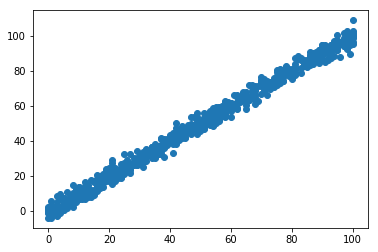

In [9]:
plt.scatter([item[1] for item in X], y)

In [10]:
def hyp(theta, X):
    return X @ theta

In [11]:
def cost(theta, X, y, m):
    J = np.sum(np.square(hyp(theta, X) - y)) / (2 * m)
    return J

In [12]:
def train_model(theta, X, y, m, lr = 0.0001):
    J = []
    cost0 = cost(theta, X, y, m)
    J.append(cost0)
    for i in range(10000):
        delta = X.T @ (hyp(theta, X) - y) / m
        theta -= lr * delta
        
        cost1 = cost(theta, X, y, m)
        J.append(cost1)
        if cost1 == 0 or cost1 > cost0:
            print(i)
            break
        cost0 = cost1
    
    return J, theta

In [13]:
theta = np.array([[-2.0], [2.0]])

J, theta = train_model(theta, X, y, m)
theta

array([[-1.59161447],
       [ 1.02289454]])

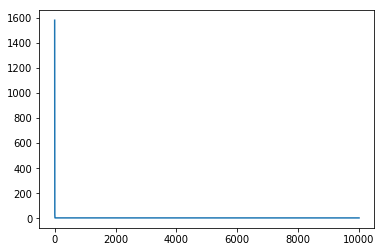

In [14]:
plt.plot(J)

In [15]:
y_calc = X @ theta

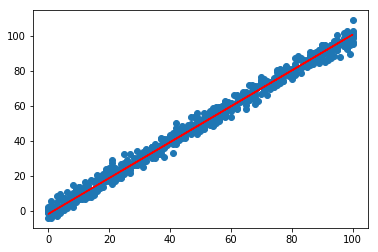

In [16]:
fig, axis = plt.subplots(1, 1)

axis.scatter([item[1] for item in X], y)
axis.plot([item[1] for item in X], y_calc, 'r')

In [17]:
test = pd.read_csv('LinearR-test.csv')
test.head()

,x,y
0,77,79.775152
1,21,23.177279
2,22,25.609262
3,20,17.857388
4,36,41.849864


In [18]:
test.describe()

,x,y
count,300.000000,300.000000
mean,50.936667,51.205051
std,28.504286,29.071481
min,0.000000,-3.467884
25%,27.000000,25.676502
50%,53.000000,52.170557
75%,73.000000,74.303007
max,100.000000,105.591837


In [19]:
n = len(test['x'])

X_test = test['x'].to_numpy().reshape((n, 1))
y_test = test['y'].to_numpy().reshape((n, 1))

In [20]:
ones = np.ones((n, 1))
X_test = np.concatenate((ones, X_test), axis=1)

In [21]:
y_pred = X_test @ theta
sq_err = 0.0

for i in range(n):
    err = np.abs(y_pred[i] - y_test[i])
    sq_err += err[0] ** 2

msq_err = sq_err / n # Mean Squared Error
rmsq_err = np.sqrt(msq_err) # Root Mean Squared Error

rmsq_err

3.11528635102117

In [27]:
mean = np.mean(y_test)
var = 0.0

n = X_test.shape[0]
for i in range(n):
    err = np.abs(y_test[i] - mean)
    var += err[0] ** 2

var = var / (n - 1) # Variance
sd = np.sqrt(var) # Standard Deviation
sd

29.0714808559721

In [28]:
r2 = 1 - msq_err / var
r2 # Root Relative Squared Error

0.988516834200617

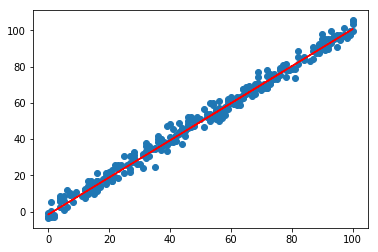

In [24]:
fig, axis = plt.subplots(1, 1)

axis.scatter([item[1] for item in X_test], y_test)
axis.plot([item[1] for item in X_test], y_pred, 'r')